In [20]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory('C:/Users/Abd ur Rehman/Desktop/Train', target_size=(224, 224), batch_size=32,class_mode='binary')
test_generator = test_datagen.flow_from_directory('C:/Users/Abd ur Rehman/Desktop/Test', target_size=(224, 224), batch_size=32, class_mode='binary')

Found 40 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [23]:
# Load the ResNet50 model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [24]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [25]:
# Add new classification layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [26]:
# Combine the base model and new layers into a single model
model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/2
2/2 [==============================] - 12s 10s/step - loss: 1.4268 - accuracy: 0.5500 - val_loss: 1.0065 - val_accuracy: 0.5333
Epoch 2/2
2/2 [==============================] - 17s 6s/step - loss: 0.9140 - accuracy: 0.5500 - val_loss: 0.6937 - val_accuracy: 0.4000


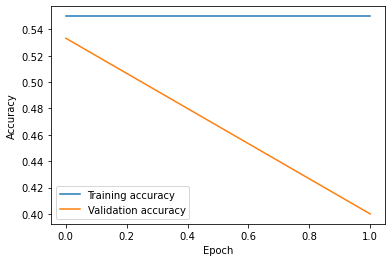

In [34]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(train_generator, epochs=2, validation_data=test_generator)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 328ms/step
This is Male [0.5007655]


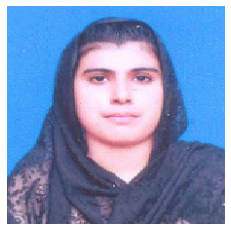

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

 #Load a test image
img_path = 'C:/Users/Abd ur Rehman/Desktop/Test/Female/22-ENG-19.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Predict the class probabilities
preds = model.predict(x)

# Print the predicted class and probability
if preds[0] > 0.5:
    print("This is Male", preds[0])
else:
    print("This is Female", 1-preds[0])

# Show the image with predicted label
plt.imshow(img)
plt.axis('off')
plt.show()